# Testing Notebook

## I. Import Functions and the Option Class

In [1]:
from options import *
import numpy as np

## II. Set Parameters

In [2]:
np.random.seed(100)

# Option variables.
spot0 = 100
call_strike = 95
put_strike = 95
r = 0.05
vol = 0.2
start_date = datetime(year=2022, month=1, day=1)
expire_date = datetime(year=2023, month=1, day=1)

# Monte Carlo pricing variables.
steps = 48
num_paths = 500
anti_paths = True
mo_match = True
save_paths = True

## III. Test Monte Carlo Pricing (Geometric Brownian Motion)

In [3]:
american_call = Option('call', spot0, call_strike, r, vol, 'american', start_date, expire_date)
american_put = Option('put', spot0, put_strike, r, vol, 'american', start_date, expire_date)
european_call = Option('call', spot0, call_strike, r, vol, 'european', start_date, expire_date)
european_put = Option('put', spot0, put_strike, r, vol, 'european', start_date, expire_date)

am_call_val = american_call.value_option('mc', steps=steps, num_paths=num_paths, 
                                         anti_paths=anti_paths, mo_match=mo_match, save_paths=save_paths)
am_put_val = american_put.value_option('mc', steps=steps, num_paths=num_paths, 
                                         anti_paths=anti_paths, mo_match=mo_match, save_paths=save_paths)
eur_call_val = european_call.value_option('mc', steps=steps, num_paths=num_paths, 
                                         anti_paths=anti_paths, mo_match=mo_match, save_paths=save_paths)
eur_put_val = european_put.value_option('mc', steps=steps, num_paths=num_paths, 
                                         anti_paths=anti_paths, mo_match=mo_match, save_paths=save_paths)

In [4]:
print(f'American Call Value: ${round(am_call_val, 2)}')
print(f'American Put Value: ${round(am_put_val, 2)}')
print(f'European Call Value: ${round(eur_call_val, 2)}')
print(f'European Put Value: ${round(eur_put_val, 2)}')

American Call Value: $12.44
American Put Value: $3.93
European Call Value: $14.22
European Put Value: $3.74


## IV. Plotting Simulated Paths

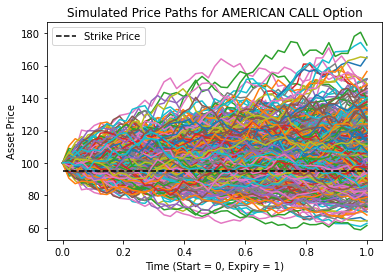

In [5]:
plot_sim_paths(steps, american_call, linestyles='dashed', color='k', label='Strike Price')

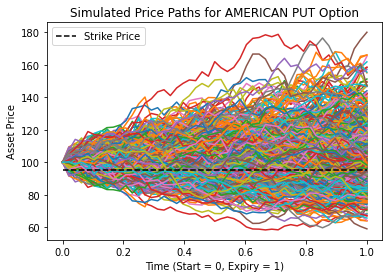

In [6]:
plot_sim_paths(steps, american_put, linestyles='dashed', color='k', label='Strike Price')

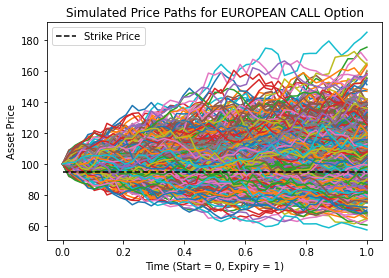

In [7]:
plot_sim_paths(steps, european_call, linestyles='dashed', color='k', label='Strike Price')

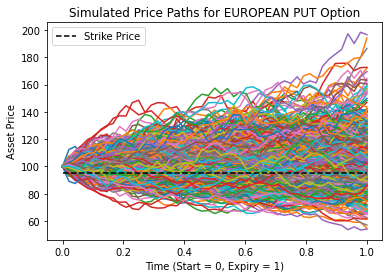

In [8]:
plot_sim_paths(steps, european_put, linestyles='dashed', color='k', label='Strike Price')

## V. Plotting Option Values vs Strike Prices

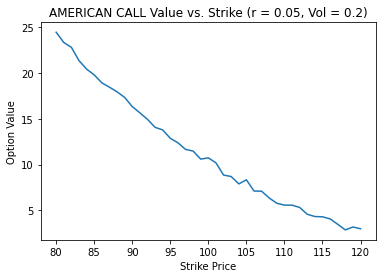

In [9]:
strike_delta = 20
# Monte Carlo pricing variables.
steps = 50
num_paths = 1000
anti_paths = True
mo_match = True
save_paths = True

plot_value_vs_strike(strike_delta=strike_delta,
                     opt_type='call', 
                     spot0=spot0,
                     r=r,
                     vol=vol,
                     exercise='american',
                     start_date=start_date,
                     expire_date=expire_date,
                     method='mc',
                     steps=steps,
                     num_paths=num_paths,
                     anti_paths=anti_paths,
                     mo_match=mo_match
                    )

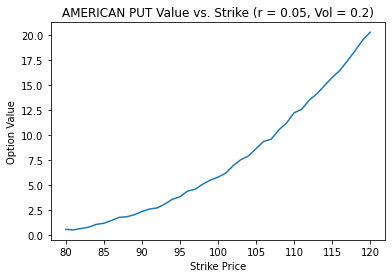

In [10]:
plot_value_vs_strike(strike_delta=strike_delta,
                     opt_type='put', 
                     spot0=spot0,
                     r=r,
                     vol=vol,
                     exercise='american',
                     start_date=start_date,
                     expire_date=expire_date,
                     method='mc',
                     steps=steps,
                     num_paths=num_paths,
                     anti_paths=anti_paths,
                     mo_match=mo_match
                    )

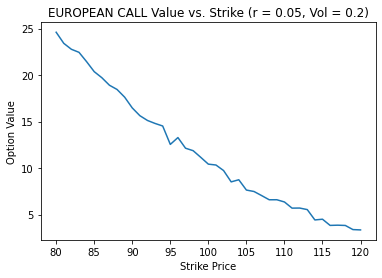

In [11]:
plot_value_vs_strike(strike_delta=strike_delta,
                     opt_type='call', 
                     spot0=spot0,
                     r=r,
                     vol=vol,
                     exercise='european',
                     start_date=start_date,
                     expire_date=expire_date,
                     method='mc',
                     steps=steps,
                     num_paths=num_paths,
                     anti_paths=anti_paths,
                     mo_match=mo_match
                    )

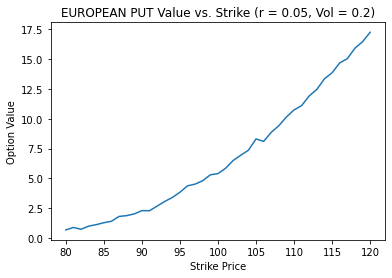

In [12]:
plot_value_vs_strike(strike_delta=strike_delta,
                     opt_type='put', 
                     spot0=spot0,
                     r=r,
                     vol=vol,
                     exercise='european',
                     start_date=start_date,
                     expire_date=expire_date,
                     method='mc',
                     steps=steps,
                     num_paths=num_paths,
                     anti_paths=anti_paths,
                     mo_match=mo_match
                    )

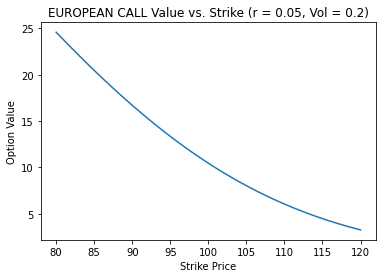

In [13]:
plot_value_vs_strike(strike_delta=strike_delta,
                     opt_type='call', 
                     spot0=spot0,
                     r=r,
                     vol=vol,
                     exercise='european',
                     start_date=start_date,
                     expire_date=expire_date,
                     method='bs'
                    )

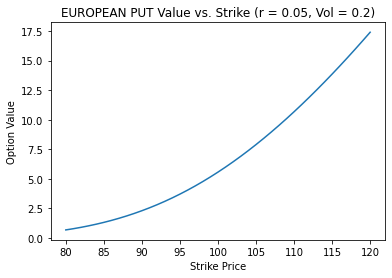

In [14]:
plot_value_vs_strike(strike_delta=strike_delta,
                     opt_type='put', 
                     spot0=spot0,
                     r=r,
                     vol=vol,
                     exercise='european',
                     start_date=start_date,
                     expire_date=expire_date,
                     method='bs'
                    )

# Black-Scholes Testing

In [15]:
bs_eur_call_val = european_call.value_option('bs')
bs_eur_put_val = european_put.value_option('bs')

In [16]:
print(f'European Call Value: ${round(bs_eur_call_val, 2)}')
print(f'Delta: {round(european_call.delta, 5)}')
print(f'Gamma: {round(european_call.gamma, 5)}')
print(f'Vega: {round(european_call.vega, 5)}')
print(f'Rho: {round(european_call.rho, 5)}')
print(f'Theta: {round(european_call.theta, 5)}')

European Call Value: $13.35
Delta: 0.7279
Gamma: 0.0166
Vega: 33.19273
Rho: 59.44328
Theta: 6.29144


In [17]:
print(f'European Put Value: ${round(bs_eur_put_val, 2)}')
print(f'Delta: {round(european_put.delta, 5)}')
print(f'Gamma: {round(european_put.gamma, 5)}')
print(f'Vega: {round(european_put.vega, 5)}')
print(f'Rho: {round(european_put.rho, 5)}')
print(f'Theta: {round(european_put.theta, 5)}')

European Put Value: $3.71
Delta: -0.2721
Gamma: 0.0166
Vega: 33.19273
Rho: -30.92351
Theta: 1.7731
